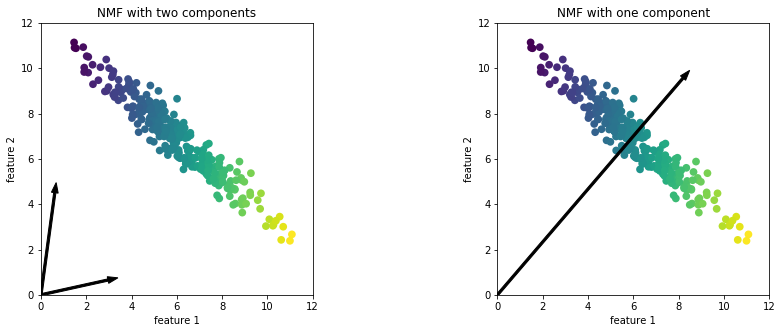

In [1]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

mglearn.plots.plot_nmf_illustration()

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.780392, ..., 0.091503],
       ...,
       [0.227451, ..., 0.930719]], dtype=float32), 
array([[0.069281, ..., 0.428758],
       ...,
       [0.159477, ..., 0.573856]], dtype=float32))


______________________________________________________nmf_faces - 573.4s, 9.6min


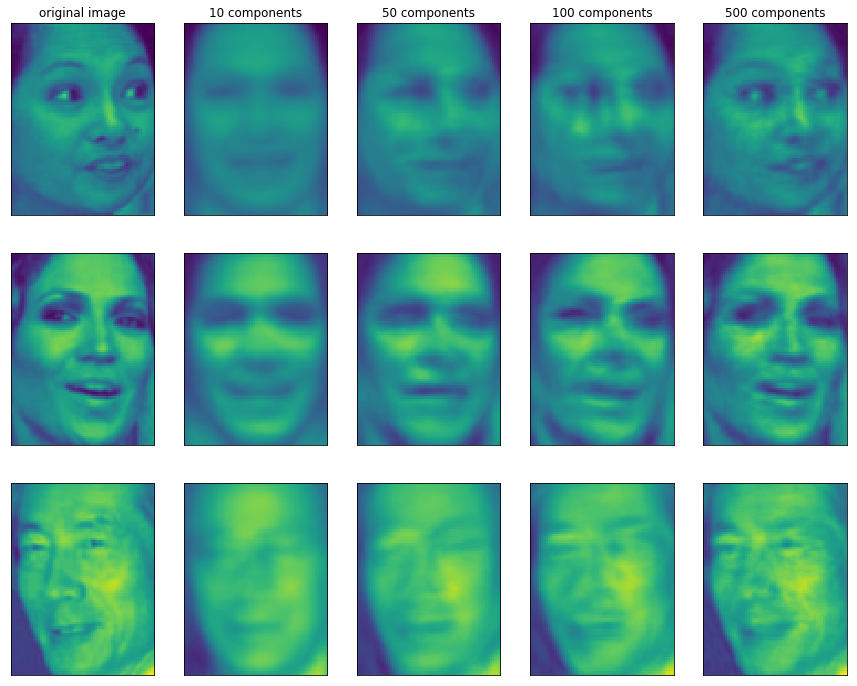

In [2]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.0

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state=0)

mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

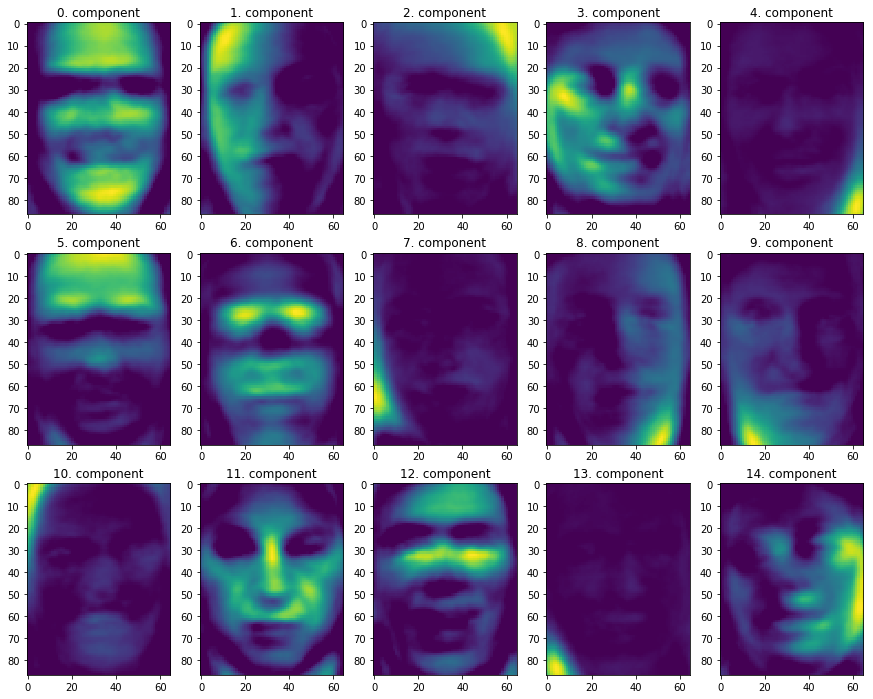

In [4]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12))
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))